## Poleward Heat Transport

In [1]:
%%capture 
# comment above line to see details about the run(s) displayed
from misc import *
%matplotlib inline

In [2]:
heat_transport = []
for path, case in zip(ocn_path, casename):
  ds = xr.open_dataset(path+case+'_heat_transport.nc')
  heat_transport.append(ds)

### Global Poleward Heat Transport

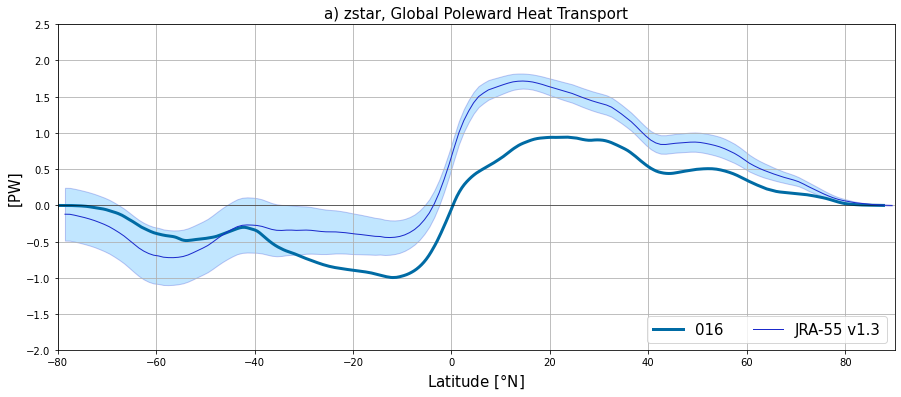

In [3]:
plt.figure(figsize=(15,6))

for i in range(len(casename)):
    plot_heat_trans(heat_transport[i], label=label[i])
  
y = heat_transport[0].yq
plt.xlim(-80,90); plt.ylim(-2.5,3.0); plt.grid(True); 
plt.plot(y, y*0., 'k', linewidth=0.5)
#plt.plot(yobs,NCEP['Global'],'k--',linewidth=0.5,label='NCEP'); 
#plt.plot(yobs,ECMWF['Global'],'k.',linewidth=0.5,label='ECMWF')
#plotGandW(GandW['Global']['lat'],GandW['Global']['trans'],GandW['Global']['err'])
jra = xr.open_dataset('/glade/work/gmarques/cesm/datasets/Heat_transport/jra55fcst_v1_3_annual_1x1/nht_jra55do_v1_3.nc')
jra_mean_global = jra.nht[:,0,:].mean('time').values
jra_std_global = jra.nht[:,0,:].std('time').values
plt.plot(jra.lat, jra_mean_global,'k', label='JRA-55 v1.3', color='#1B2ACC', lw=1)
plt.fill_between(jra.lat, jra_mean_global-jra_std_global, jra_mean_global+jra_std_global,
    alpha=0.25, edgecolor='#1B2ACC', facecolor='#089FFF')

plt.title('a) zstar, Global Poleward Heat Transport',fontsize=15)
plt.xlabel(r'Latitude [$\degree$N]',fontsize=15)
plt.ylabel('[PW]',fontsize=15)
plt.legend(loc=4,fontsize=15, ncol=2)
plt.ylim(-2.,2.5);

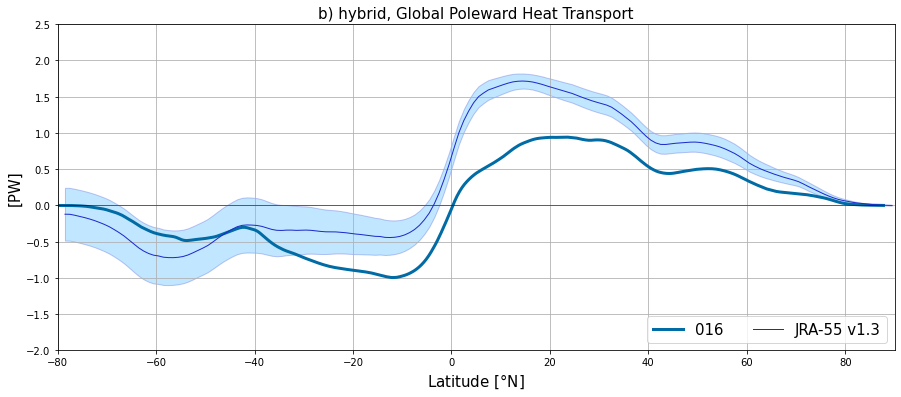

In [4]:
plt.figure(figsize=(15,6))

for i in range(len(casename)):
    plot_heat_trans(heat_transport[i], label=label[i])
  
y = heat_transport[0].yq
plt.xlim(-80,90); plt.ylim(-2.5,3.0); plt.grid(True); 
plt.plot(y, y*0., 'k', linewidth=0.5)
#plt.plot(yobs,NCEP['Global'],'k--',linewidth=0.5,label='NCEP'); 
#plt.plot(yobs,ECMWF['Global'],'k.',linewidth=0.5,label='ECMWF')
#plotGandW(GandW['Global']['lat'],GandW['Global']['trans'],GandW['Global']['err'])
jra = xr.open_dataset('/glade/work/gmarques/cesm/datasets/Heat_transport/jra55fcst_v1_3_annual_1x1/nht_jra55do_v1_3.nc')
jra_mean_global = jra.nht[:,0,:].mean('time').values
jra_std_global = jra.nht[:,0,:].std('time').values
plt.plot(jra.lat, jra_mean_global,'k', label='JRA-55 v1.3', color='#1B2ACC', lw=1)
plt.fill_between(jra.lat, jra_mean_global-jra_std_global, jra_mean_global+jra_std_global,
    alpha=0.25, edgecolor='#1B2ACC', facecolor='#089FFF')

plt.title('b) hybrid, Global Poleward Heat Transport',fontsize=15)
plt.xlabel(r'Latitude [$\degree$N]',fontsize=15)
plt.ylabel('[PW]',fontsize=15)
plt.legend(loc=4,fontsize=15, ncol=2)
plt.ylim(-2.,2.5);

### Atlantic Poleward Heat Transport

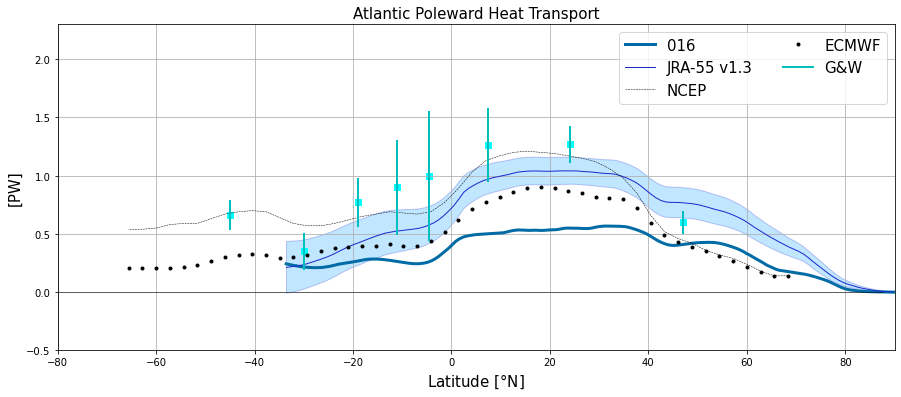

In [5]:
plt.figure(figsize=(15,6))

for i in range(len(casename)):
  basin_code = genBasinMasks(grd[i].geolon, grd[i].geolat, depth[i])
  m = 0*basin_code; m[(basin_code==2) | (basin_code==4) | (basin_code==6) | (basin_code==7) | (basin_code==8)] = 1

  HTplot = heatTrans(heat_transport[i].T_ady_2d, 
           heat_transport[i].T_diffy_2d,
           heat_transport[i].T_hbd_diffy_2d,
           vmask=m*np.roll(m,-1,axis=-2))

  yy = grd[i].geolat_c[:,:].max(axis=-1)
  HTplot[yy<-34] = np.nan
  plt.plot(yy,HTplot, linewidth=3,label=label[i])
  
jra_mean_atl = jra.nht[:,1,:].mean('time').values
jra_std_atl = jra.nht[:,1,:].std('time').values
plt.plot(jra.lat, jra_mean_atl,'k', label='JRA-55 v1.3', color='#1B2ACC', lw=1)
plt.fill_between(jra.lat, jra_mean_atl-jra_std_atl, jra_mean_atl+jra_std_atl,
alpha=0.25, edgecolor='#1B2ACC', facecolor='#089FFF')
plt.plot(yobs,NCEP['Atlantic'],'k--',linewidth=0.5,label='NCEP')
plt.plot(yobs,ECMWF['Atlantic'],'k.',linewidth=0.5,label='ECMWF')
plotGandW(GandW['Atlantic']['lat'],GandW['Atlantic']['trans'],GandW['Atlantic']['err'])
plt.xlabel(r'Latitude [$\degree$N]',fontsize=15)
plt.title('Atlantic Poleward Heat Transport',fontsize=15)
plt.legend(ncol=2,fontsize=15)
plt.ylabel('[PW]',fontsize=15)
plt.xlim(-80,90); plt.ylim(-0.5,2.3); plt.grid(True)
plt.plot(y, y*0., 'k', linewidth=0.5);

### Indo-Pacific Poleward Heat Transport

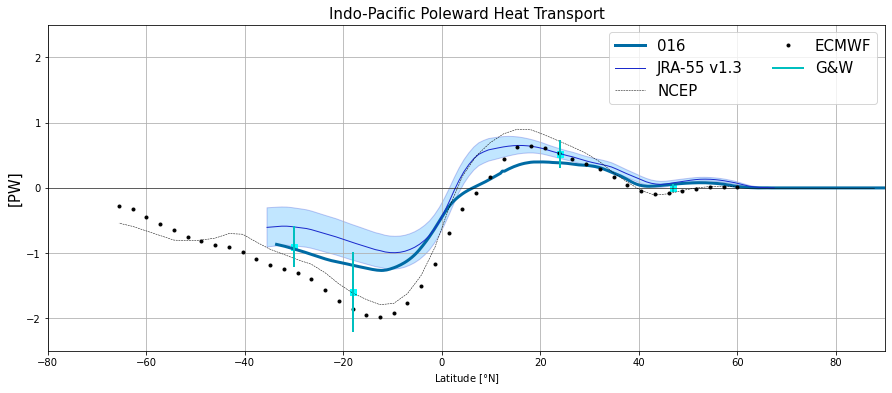

In [6]:
plt.figure(figsize=(15,6))

for i in range(len(casename)):
  basin_code = genBasinMasks(grd[i].geolon, grd[i].geolat, depth[i])
  m = 0*basin_code; m[(basin_code==3) | (basin_code==5)] = 1
  HTplot = heatTrans(heat_transport[i].T_ady_2d, 
           heat_transport[i].T_diffy_2d,
           heat_transport[i].T_hbd_diffy_2d,
           vmask=m*np.roll(m,-1,axis=-2))

  yy = grd[i].geolat_c[:,:].max(axis=-1)
  HTplot[yy<-34] = np.nan
  plt.plot(yy,HTplot, linewidth=3,label=label[i])

jra_mean_indo = jra.nht[:,2,:].mean('time').values
jra_std_indo = jra.nht[:,2,:].std('time').values
plt.plot(jra.lat, jra_mean_indo,'k', label='JRA-55 v1.3', 
                 color='#1B2ACC', lw=1)
plt.fill_between(jra.lat, jra_mean_indo-jra_std_indo, 
                 jra_mean_indo+jra_std_indo,
                 alpha=0.25, edgecolor='#1B2ACC', 
                 facecolor='#089FFF')

plt.plot(yobs,NCEP['IndoPac'],'k--',linewidth=0.5,label='NCEP')
plt.plot(yobs,ECMWF['IndoPac'],'k.',linewidth=0.5,label='ECMWF')
plotGandW(GandW['IndoPac']['lat'],GandW['IndoPac']['trans'],GandW['IndoPac']['err'])
plt.xlabel(r'Latitude [$\degree$N]',fontsize=10)
plt.legend(ncol=2,fontsize=15)
plt.title('Indo-Pacific Poleward Heat Transport',fontsize=15)
plt.ylabel('[PW]',fontsize=15)
plt.xlim(-80,90); plt.ylim(-2.5,2.5); plt.grid(True)
plt.plot(y, y*0., 'k', linewidth=0.5);

## By components

In [7]:
colors = ['tab:blue','tab:orange','tab:green','tab:purple','tab:gray','tab:cyan']

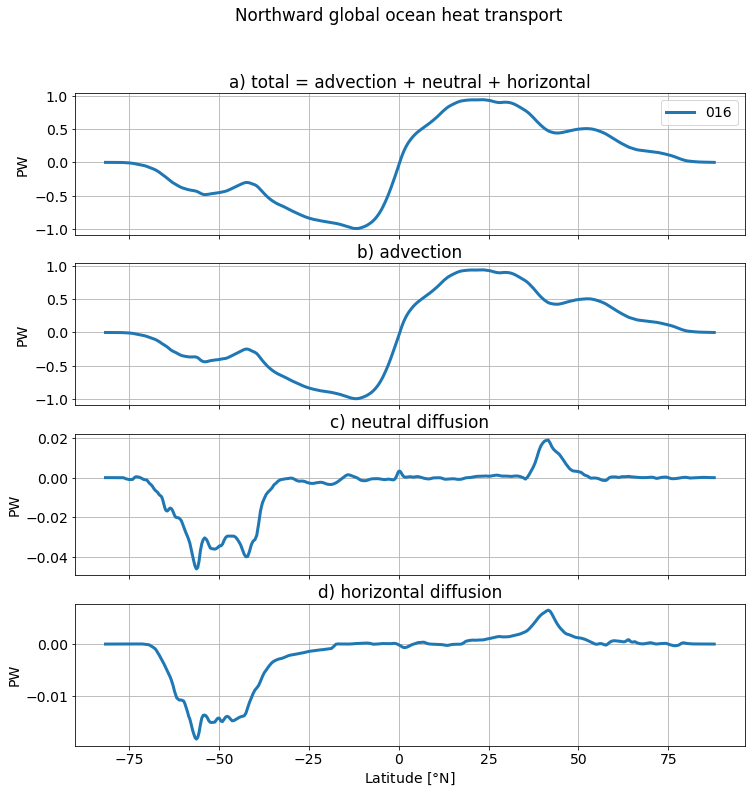

In [8]:
matplotlib.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(12,12), sharex=True)
plt.suptitle('Northward global ocean heat transport')
for i in range(len(casename)):
  #print(i)
  ds = heat_transport[i]
  #print(ds)
  total = (ds.T_ady_2d + ds.T_diffy_2d +
          ds.T_hbd_diffy_2d) 
  (total.sum(dim='xh')* 1.e-15).plot(ax=ax[0], lw=3,label=label[i], color=colors[i]); 
  (ds.T_ady_2d.sum(dim='xh')* 1.e-15).plot(ax=ax[1], lw=3,label=label[i], color=colors[i]); 
  (ds.T_diffy_2d.sum(dim='xh') * 1.e-15).plot(ax=ax[2], lw=3, color=colors[i]); 
  (ds.T_hbd_diffy_2d.sum(dim='xh') * 1.e-15).plot(ax=ax[3], lw=3, color=colors[i]); 

ax[0].legend(ncol=2)
ax[0].grid(); ax[1].grid();ax[2].grid(); ax[3].grid()
#ax[0].set_ylim(-1.5, 1.5); ax[1].set_ylim(-1.5, 1.5)
#ax[2].set_ylim(-0.075, 0.05); ax[3].set_ylim(-0.075, 0.05)
ax[0].set_ylabel('PW');ax[1].set_ylabel('PW');ax[2].set_ylabel('PW'); ax[3].set_ylabel('PW')
ax[0].set_xlabel('');ax[1].set_xlabel(''); ax[2].set_xlabel(''); ax[3].set_xlabel('Latitude [$\degree$N]')

ax[0].set_title('a) total = advection + neutral + horizontal')
ax[1].set_title('b) advection')
ax[2].set_title('c) neutral diffusion');
ax[3].set_title('d) horizontal diffusion');